In [7]:
import pandas as pd
import numpy as np
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./data/imdb_data.csv')

In [8]:
def trim(para):
    return float('%.2f' % para)

## What's the probability that a movie was longer than an hour and a half? Two hours?

In [9]:
movies_amnt = 0
for i in df['movie_title']:
    movies_amnt+=1

trim( df['duration'][df['duration'] > 90].count() / movies_amnt )

0.81

In [10]:
trim( df['duration'][df['duration'] > 120].count() / movies_amnt )

0.21

## What's the probability that a movie was directed by Steven Spielberg?

In [11]:
df[df['director_name'] == "Steven Spielberg"].shape[0] / movies_amnt

0.005155661312710688

## What's the probability that a movie directed by Clint Eastwood will gross under budget?

In [25]:
eastwood = df[['director_name', 'profit']][df['director_name'] == 'Clint Eastwood']
eastwood[df.profit >= 0]['profit'].count() / eastwood['director_name'].count()

0.95


## What's the probability that a movie generally grossed more than its budget?

In [13]:
trim ( df[df['gross'] - df['budget']>0].shape[0] / movies_amnt )

0.41

## What's the probability that a movie grossed over the average gross of this data set?

In [14]:
trim( df[df['gross'] > df['gross'].mean()].shape[0] / movies_amnt )

0.26

## worth renting, if not seeing in theaters.

In [15]:
specs_a = df[(df['gross'] > df['budget']) & (df['imdb_score'] > 6)].count()
specs_b = df[(df['gross'] < df['budget']) & (df['imdb_score'] < 6)].count()
watch = specs_a / specs_b
trim( watch['gross'] )

2.51

## In the IMDB dataset, what are the false positive and false negative rates? Can you provide some examples of each?

In [16]:
df[(df['gross'] > df['budget']) & (df['imdb_score'] > 6)].head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000


### If I’m a production studio exec and Tom Hanks is starring in my movie but I’m feeling uncertain about whether we should keep him (will he make as much money as we want?), tell me should I keep him in the movie or switch him out for Harrison Ford?

In [17]:
df[(df['gross'] < df['budget']) & (df['imdb_score']< 6)].head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
28,Color,Peter Berg,377.0,131.0,532.0,627.0,Alexander Skarsgård,14000.0,65173160.0,Action|Adventure|Sci-Fi|Thriller,...,751.0,English,USA,PG-13,209000000.0,2012.0,10000.0,5.9,2.35,44000
42,Color,Martin Campbell,436.0,123.0,258.0,326.0,Temuera Morrison,16000.0,116593191.0,Action|Adventure|Sci-Fi,...,550.0,English,USA,PG-13,200000000.0,2011.0,368.0,5.6,2.35,24000
60,Color,Roland Emmerich,367.0,158.0,776.0,310.0,Liam James,1000.0,166112167.0,Action|Adventure|Sci-Fi,...,1055.0,English,USA,PG-13,200000000.0,2009.0,468.0,5.8,2.35,13000
62,Color,Lana Wachowski,384.0,127.0,0.0,13000.0,Mila Kunis,17000.0,47375327.0,Action|Adventure|Sci-Fi,...,720.0,English,USA,PG-13,176000000.0,2015.0,15000.0,5.4,2.35,44000
71,Color,Barry Sonnenfeld,85.0,106.0,188.0,582.0,Salma Hayek,10000.0,113745408.0,Action|Comedy|Sci-Fi|Western,...,648.0,English,USA,PG-13,170000000.0,1999.0,4000.0,4.8,1.85,0


### Same as above, but I’m judging on the ratings of the movie instead of the gross/budget.

## What’s the probability that a movie’s length will be between 1hr 10mins and 1h 30mins?

In [18]:
trim ( df.duration[(df['duration'] >= 70) & (df['duration'] <= 90)].count() / df['duration'].count() )

0.16

## How does the distribution of movie budgets compare to the movie gross values?

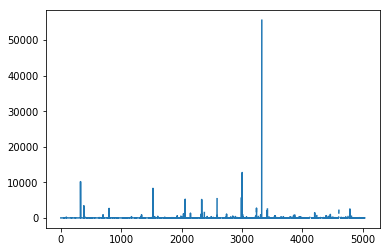

In [24]:
budgets = df[df.budget.notnull()]['budget']
grosses = df[df.gross.notnull()]['gross']
answer = budgets/grosses
answer.plot()

## Does Nicolas Cage statistically have worse movies than the rest?

In [20]:
nick = df[(df.actor_1_name == "Nicolas Cage") | (df.actor_2_name == "Nicolas Cage") | (df.actor_3_name == "Nicolas Cage")]
not_nick = df[(df.actor_1_name != "Nicolas Cage") & (df.actor_2_name != "Nicolas Cage") & (df.actor_3_name != "Nicolas Cage")]
nick_compare = nick['imdb_score'].mean() / not_nick['imdb_score'].mean()

print('Nicolas Cage scores on average {:.2f}%'.format(1 - nick_compare))

Nicolas Cage scores on average 0.05%


## Have any years grossed a statistically-significant higher amount than the other years?

[Text(0,0.5,'Combined Annual Gross (Billions)'), Text(0.5,0,'Years')]

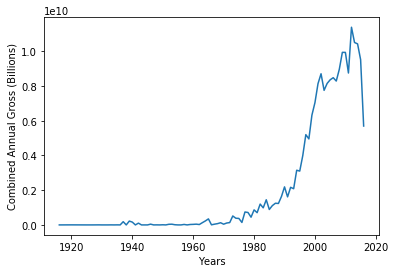

In [21]:
ax = df['gross'].groupby(df.title_year).sum().plot(kind='line')
ax.set(xlabel='Years',ylabel='Combined Annual Gross (Billions)')